### Wine Quality Classification using Decision Trees

In [25]:
import numpy as np 
import pandas as pd 
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split,GridSearchCV

In [4]:
ranajay= pd.read_csv("E:\\Machine Learning\\Decision tree\\winequality_red.csv")
ranajay.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
ranajay["quality"].unique() #finding unique values in quality column for personal interest

array([5, 6, 7, 4, 8, 3], dtype=int64)

The data set consists following Input variables :
1 - fixed acidity  2 - volatile acidity  3 - citric acid  4 - residual sugar  5 - chlorides  6 - free sulfur dioxide

7 - total sulfur dioxide  8 - density  9 - pH   10 - sulphates   11 - alcohol

and the Output variable gives the quality of th wine based on the input variables: 

12 - quality (score between 0 and 10)

In [6]:
ranajay.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


We see that there are no missing values. Also since we will use decision  trees, no need to worry about outliers!

In [7]:
df=ranajay.copy() #creating a copy of this dataframe

In [12]:
X= df.drop(columns=['quality'])
Y=df['quality']

In [11]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [13]:
#Train,test splitting
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)

In [15]:
# Decision tree classifier 

clf= DecisionTreeClassifier(random_state = 100)

#fitting the training data

clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=100)

In [16]:
y_test.shape

(480,)

[Text(593.7606595849802, 1055.2235294117647, 'X[10] <= 10.25\ngini = 0.643\nsamples = 1119\nvalue = [7, 36, 477, 445, 140, 14]'),
 Text(300.86235177865615, 991.2705882352941, 'X[6] <= 51.5\ngini = 0.526\nsamples = 603\nvalue = [4, 22, 371, 184, 21, 1]'),
 Text(155.02144268774703, 927.3176470588236, 'X[9] <= 0.575\ngini = 0.592\nsamples = 353\nvalue = [4, 17, 181, 132, 18, 1]'),
 Text(28.892490118577076, 863.364705882353, 'X[10] <= 9.05\ngini = 0.498\nsamples = 138\nvalue = [3, 13, 93, 27, 2, 0]'),
 Text(7.057707509881423, 799.4117647058824, 'X[4] <= 0.071\ngini = 0.656\nsamples = 8\nvalue = [1, 2, 1, 4, 0, 0]'),
 Text(3.5288537549407115, 735.4588235294118, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 0, 4, 0, 0]'),
 Text(10.586561264822134, 735.4588235294118, 'X[9] <= 0.515\ngini = 0.625\nsamples = 4\nvalue = [1, 2, 1, 0, 0, 0]'),
 Text(7.057707509881423, 671.5058823529412, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0, 0, 0, 0]'),
 Text(14.115415019762846, 671.5058823529412, 'X[4] <= 0.075\n

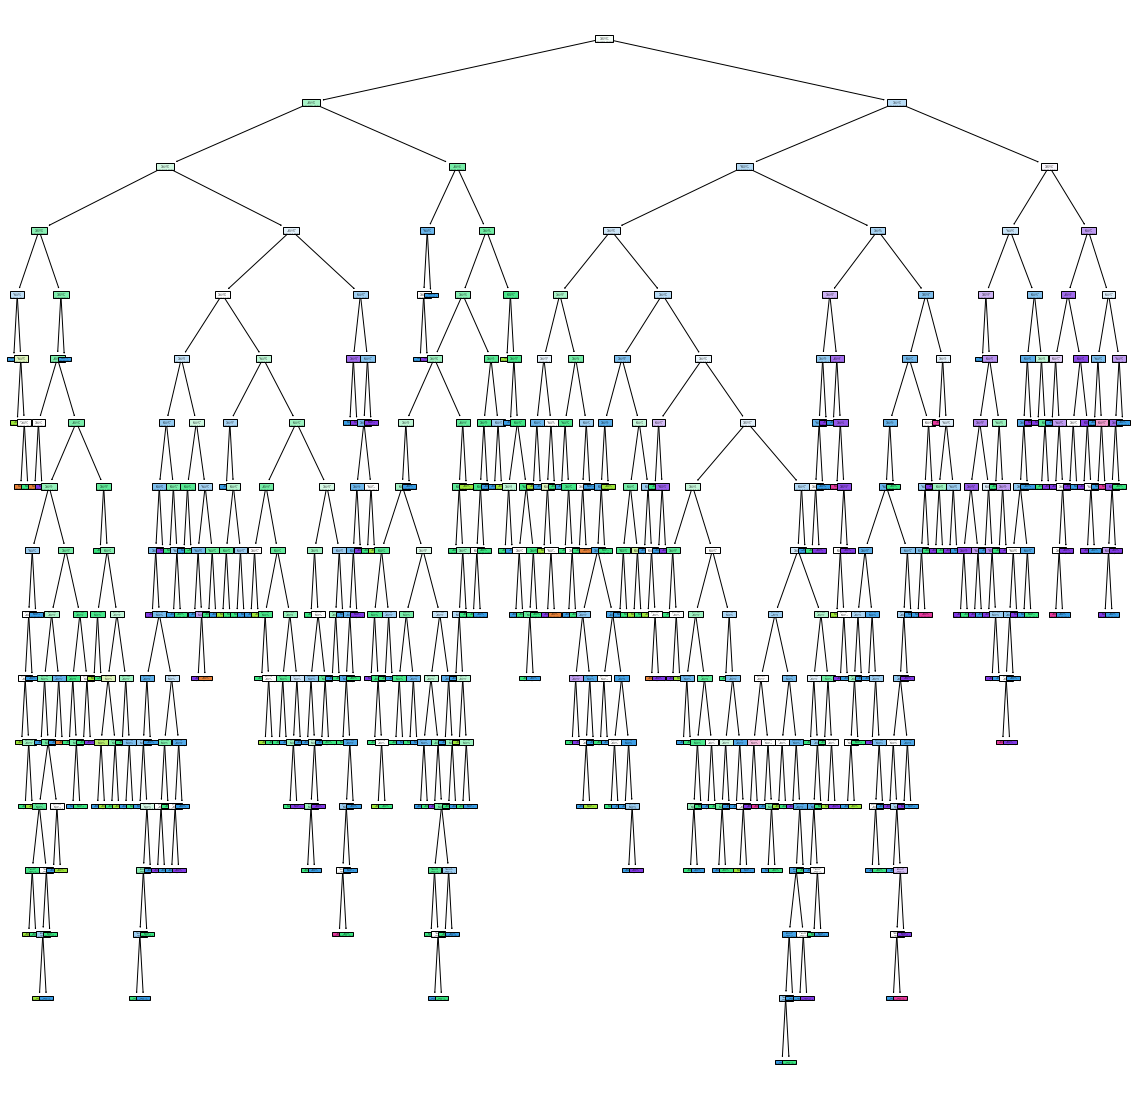

In [31]:
#Tree plotting 
plt.figure(figsize=(20,20))
tree.plot_tree(clf,filled=True)


In [18]:
#prediction

y_pred = clf.predict(X_test)
y_pred

array([6, 7, 5, 5, 7, 7, 5, 6, 6, 7, 7, 5, 6, 5, 6, 5, 5, 5, 6, 5, 6, 5,
       6, 7, 7, 6, 5, 6, 5, 5, 5, 5, 7, 6, 5, 6, 6, 6, 6, 5, 5, 5, 6, 6,
       6, 7, 5, 6, 5, 6, 6, 5, 6, 5, 6, 6, 6, 6, 5, 5, 7, 5, 7, 7, 6, 5,
       5, 5, 4, 5, 6, 6, 6, 7, 6, 6, 5, 6, 5, 5, 5, 6, 7, 6, 4, 5, 5, 6,
       5, 6, 6, 5, 7, 5, 6, 5, 7, 5, 5, 6, 6, 6, 5, 5, 5, 6, 6, 6, 6, 5,
       7, 5, 7, 5, 6, 6, 5, 6, 6, 6, 6, 6, 5, 7, 6, 6, 7, 6, 5, 5, 6, 6,
       5, 7, 8, 6, 7, 7, 4, 7, 6, 5, 7, 5, 5, 5, 5, 5, 7, 5, 6, 4, 7, 6,
       7, 5, 6, 5, 5, 6, 5, 6, 6, 5, 6, 6, 6, 6, 5, 4, 5, 6, 6, 7, 6, 6,
       6, 7, 5, 7, 6, 5, 5, 6, 6, 5, 6, 4, 7, 5, 6, 6, 5, 6, 5, 5, 5, 6,
       6, 5, 6, 5, 6, 5, 7, 6, 6, 7, 6, 6, 5, 6, 5, 5, 5, 6, 6, 5, 6, 6,
       5, 6, 5, 5, 7, 5, 5, 7, 6, 4, 5, 5, 6, 6, 6, 6, 5, 5, 6, 5, 6, 5,
       6, 4, 6, 5, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 5, 6, 5, 5, 5, 5, 5, 4,
       6, 7, 5, 5, 7, 6, 5, 7, 6, 5, 6, 5, 7, 6, 5, 6, 5, 6, 6, 6, 6, 5,
       5, 7, 5, 5, 7, 5, 6, 6, 6, 6, 5, 5, 6, 7, 5,

In [19]:
#Accurcay of the model 

accuracy_score(y_test, y_pred)

0.6229166666666667

#### Let us now hyperparameter tune the model

In [23]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [26]:
grid_search = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [27]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [28]:
best_parameters=grid_search.best_params_
best_parameters

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'random'}

In [29]:
clf1=DecisionTreeClassifier(criterion = 'gini', max_depth =5, min_samples_leaf= 1, min_samples_split= 2, splitter ='random')
clf1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, splitter='random')

In [30]:
clf1.score(X_test,y_test)

0.5708333333333333

[Text(677.5714285714286, 996.6, 'X[10] <= 10.802\ngini = 0.643\nsamples = 1119\nvalue = [7, 36, 477, 445, 140, 14]'),
 Text(364.40816326530614, 815.4000000000001, 'X[10] <= 10.008\ngini = 0.564\nsamples = 777\nvalue = [5, 25, 431, 274, 41, 1]'),
 Text(182.20408163265307, 634.2, 'X[9] <= 0.616\ngini = 0.514\nsamples = 533\nvalue = [4, 21, 337, 154, 16, 1]'),
 Text(91.10204081632654, 453.0, 'X[6] <= 40.524\ngini = 0.445\nsamples = 312\nvalue = [3, 15, 221, 70, 3, 0]'),
 Text(45.55102040816327, 271.79999999999995, 'X[4] <= 0.239\ngini = 0.519\nsamples = 139\nvalue = [1, 10, 88, 38, 2, 0]'),
 Text(22.775510204081634, 90.59999999999991, 'gini = 0.512\nsamples = 138\nvalue = [0, 10, 88, 38, 2, 0]'),
 Text(68.32653061224491, 90.59999999999991, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0, 0, 0]'),
 Text(136.65306122448982, 271.79999999999995, 'X[0] <= 12.465\ngini = 0.374\nsamples = 173\nvalue = [2, 5, 133, 32, 1, 0]'),
 Text(113.87755102040816, 90.59999999999991, 'gini = 0.367\nsamples = 17

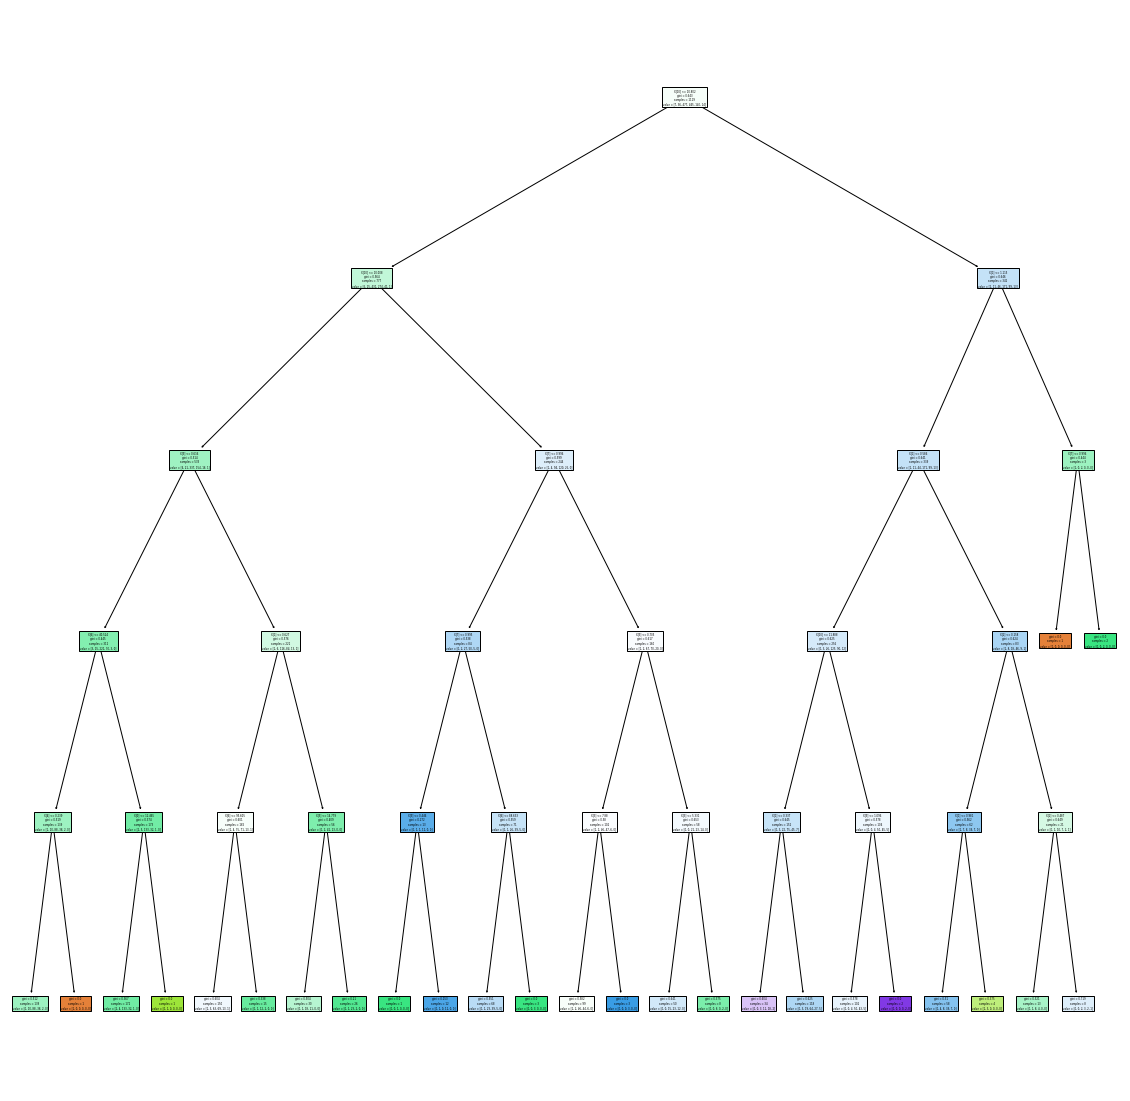

In [32]:
plt.figure(figsize=(20,20))
tree.plot_tree(clf1,filled=True)